In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import datetime
import warnings
from jupyterthemes import jtplot

import logging

In [2]:
logging.getLogger().setLevel(logging.CRITICAL)

from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *

In [3]:
jtplot.style('default', grid=False)
plt.rcParams['errorbar.capsize'] = 8
plt.rcParams['font.size'] = 18
plt.rc('font', size= 18)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 18)
plt.rc('ytick', labelsize= 18)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)

In [4]:
asf = dict({'C1s' : 0.296, 'O1s' : 0.711, 'N1s' : 0.477, 'Br3p' : 1.054, 'Br3d' : 1.054,
           'In3d' : 4.359, 'Sn3d' : 4.725, 'Cl2p' : 0.891, 'Si2p': 0.339})

In [49]:
def plot_xp_regions(experiments : list, regions : list, ncols: int = 3):
    """Subplots all regions of a list of experiments (unnormalised)"""
    rows = int(np.ceil(len(regions) / ncols))

    fig, ax = plt.subplots(rows, ncols, figsize=(16, 8))
    for i,r in enumerate(regions):
            for c,xp in enumerate(experiments):
                j, k = i//ncols, i%ncols
                if i == len(regions) - 1:   # Set labels from last region
                    lb = xp.name
                else:
                    lb='__nolabel__'
                
                try:
                    li = plot_region(xp, r, ax=ax[j][k], lb=lb)
                except KeyError:
                    pass
                
                ax[j][k].set_title(r)
                leg = ax[j][k].get_legend()
                if leg is not None: leg.remove()
                cosmetics_plot(ax=ax[j][k], leg = False);
                
            if len(experiments)%2 == 0:
                ax[j][k].invert_xaxis()
    fig.legend(loc='upper right', bbox_to_anchor=(1.12, 0.5), fontsize=16)
    plt.tight_layout()

# APTES annealing data

ToDo:
- Subtract O1s from plasma data
- Check alignment to reference
- Smooth Si, N?
- Fit HD data

In [52]:
path_clean = '/Users/pabloherrero/sabat/xps_spectra/ITO_ox/6_ITO_sputter_anneal_plasma_10h/20200123_ITO_sputter_anneal_plasma_10h.xy'


In [33]:
path = '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/ITO_APTES_anneal/proc/*.xy'

files = glob.glob(path, recursive=True)
files.sort()

files_new = []

for f in files:
        files_new.append(f)
files = files_new
files


files[2:] = files[1:]
files[1], files[-1] = files[-1], files[1]
files.pop(-1)
files

['/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/ITO_APTES_anneal/proc/20201203_ITO_DEA_ZTF594_PA1_RT.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/ITO_APTES_anneal/proc/20201203_ITO_DEA_ZTF594_PA1_annealing50-100.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/ITO_APTES_anneal/proc/20201203_ITO_DEA_ZTF594_PA1_annealing105-125.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/ITO_APTES_anneal/proc/20201203_ITO_DEA_ZTF594_PA1_annealing125-140.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/ITO_APTES_anneal/proc/20201203_ITO_DEA_ZTF594_PA1_annealing140-170.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/ITO_APTES_anneal/proc/20201203_ITO_DEA_ZTF594_PA1_annealing170-200.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/ITO_APTES_anneal/proc/20201203_ITO_DEA_ZTF594_PA1_annealing205-230.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/ITO_APTES_anneal/proc/20201203_ITO_DEA_ZTF594_PA1_annealing230.xy']

In [34]:
proc_exps = []

for f in files:
    ls = 'solid'
    proc_exps.append(read_processed_xp(f, ls=ls))

In [35]:
proc_exps[7].color = 'brown'
proc_exps[5].color = 'lime'

## Show individual plots

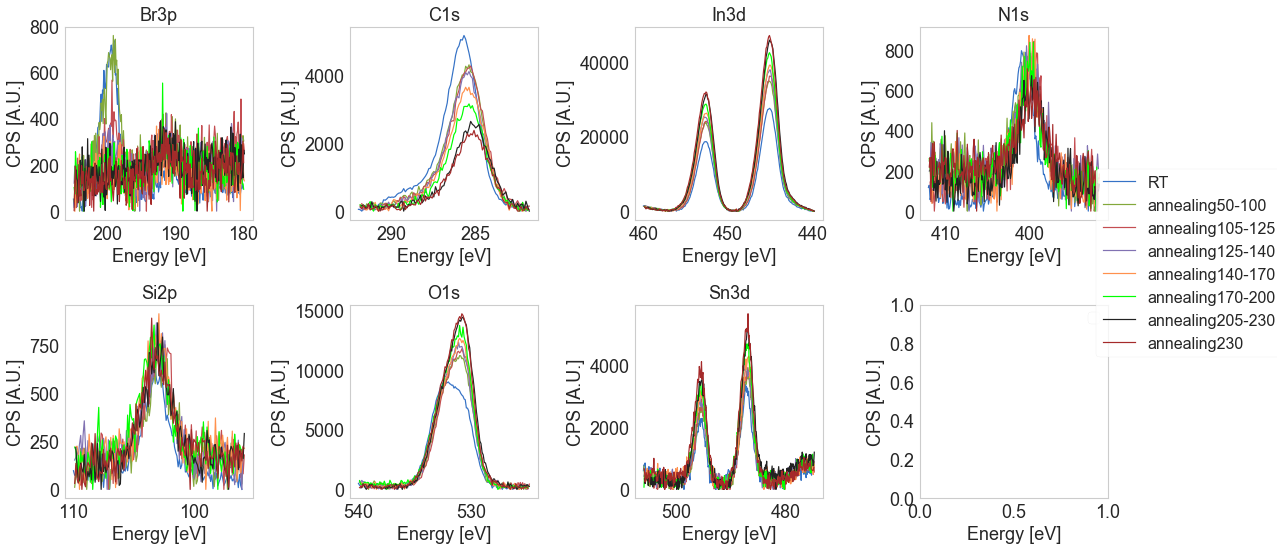

In [36]:
regions = ['Br3p', 'C1s', 'In3d', 'N1s', 'Si2p', 'O1s', 'Sn3d']
plot_xp_regions(proc_exps, regions, ncols=4)

Text(0.5, 1.0, 'In 3d')

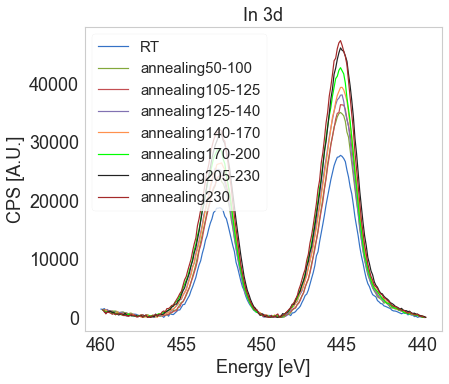

In [38]:
for xp in proc_exps:
    plot_region(xp, 'In3d')
cosmetics_plot()
plt.title('In 3d')

Text(0.5, 1.0, 'N1s')

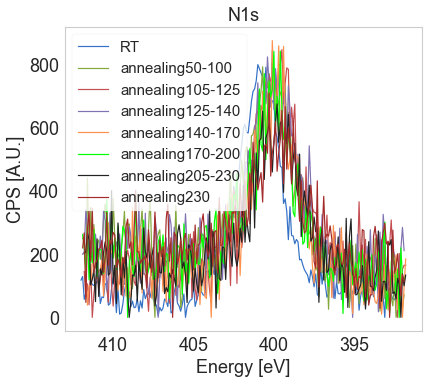

In [49]:
region = 'N1s'
for xp in proc_exps:
    plot_region(xp, region)
cosmetics_plot()
plt.title(region)

Text(0.5, 1.0, 'N1s')

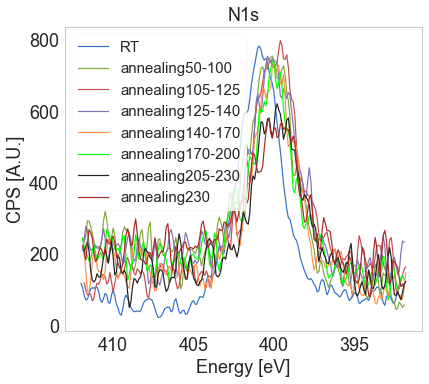

In [51]:
region = 'N1s'
for xp in proc_exps:
    smooth = gaussian_smooth(xp, region, sigma=1)
    plot_region(smooth, region)
cosmetics_plot()
plt.title(region)

## Integrate areas

In [39]:
for xp in proc_exps:
    xp.area = {}

### C 1s

/Users/pabloherrero/sabat/sabatsw/xps/xps_analysis.py:64: RuntimeWarning: invalid value encountered in greater
  dropup = np.where(xp.dfx[region].energy.values > eup)[0]


[13981.214873042429,
 12188.884484159951,
 12123.585372428242,
 11275.638025968305,
 10346.04168299495,
 9019.050898528103,
 7572.916281940454,
 6700.472221701893]

<Figure size 460.8x403.2 with 0 Axes>

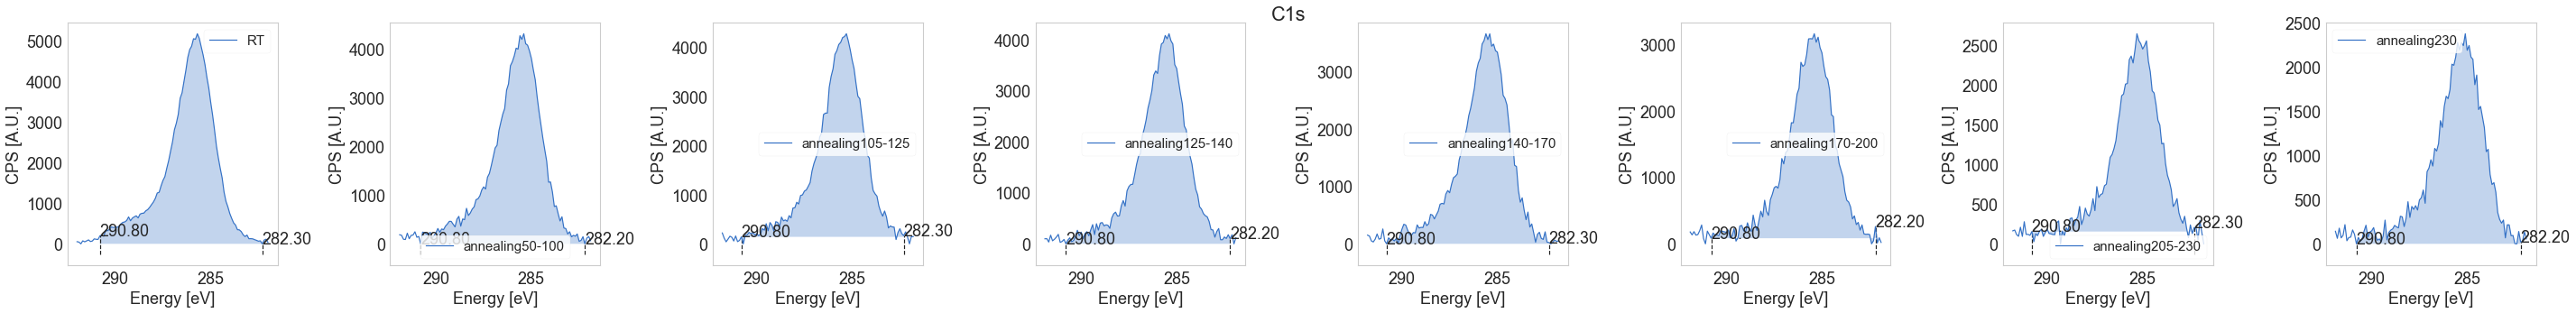

In [40]:
region = 'C1s'
integrateRegions(proc_exps, region, indRef=1, asf=asf)

### O 1s

[37687.00943213643,
 42119.33746259409,
 43331.327679783026,
 44041.31070356724,
 45945.87239157109,
 48868.7683806179,
 51312.52690450569,
 51661.64657690906]

<Figure size 460.8x403.2 with 0 Axes>

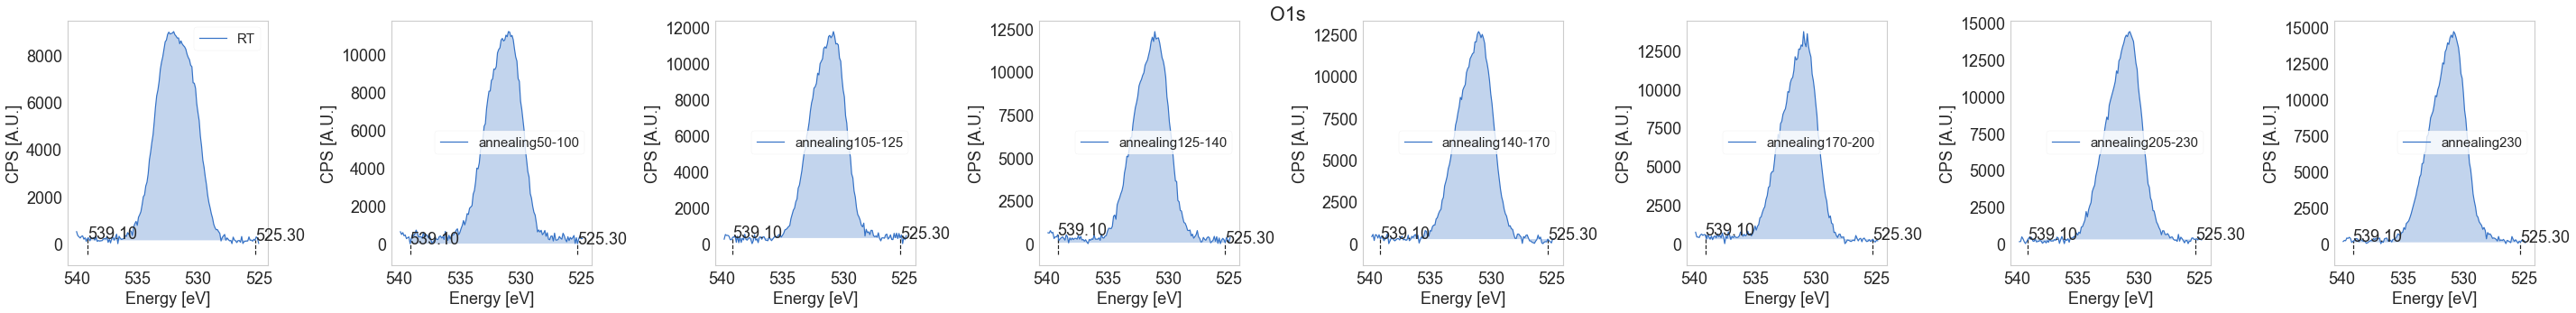

In [41]:
region = 'O1s'
integrateRegions(proc_exps, region, indRef=1, asf=asf)

### N 1s

[3315.692261350515,
 4432.980274920637,
 4597.411662527522,
 4596.954458995564,
 3909.6927388471313,
 4193.819188230884,
 3799.191784900736,
 4327.424366083256]

<Figure size 460.8x403.2 with 0 Axes>

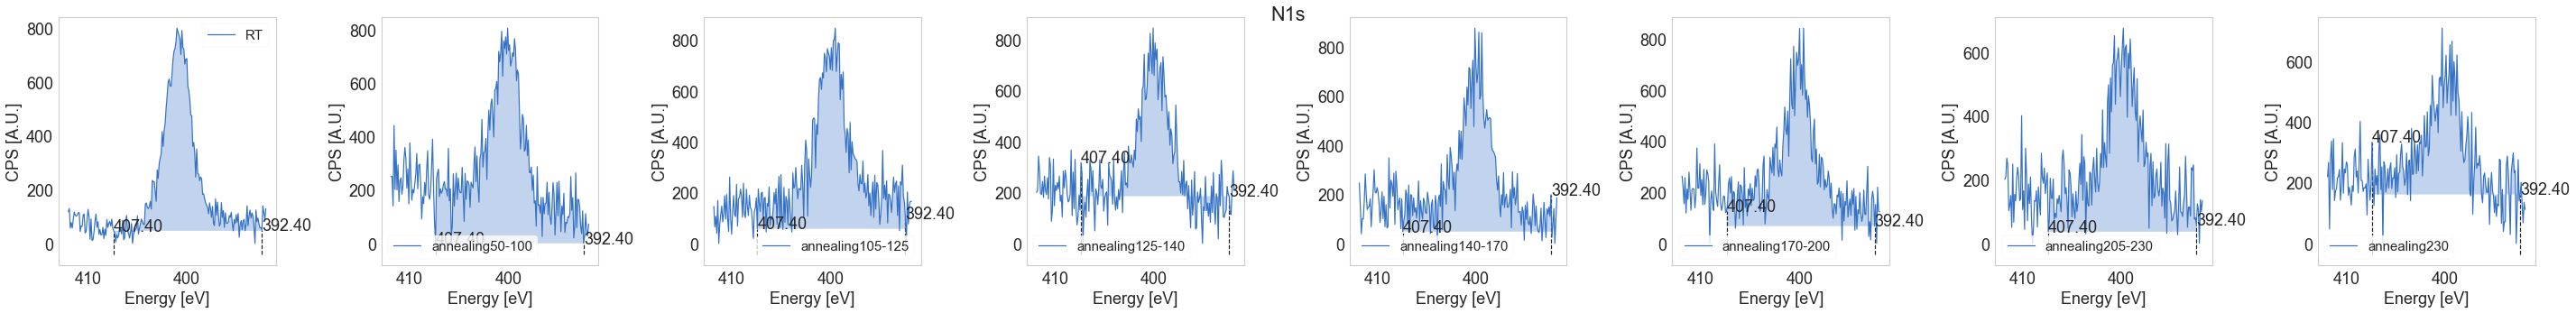

In [42]:
region = 'N1s'
integrateRegions(proc_exps, region, indRef=1, asf=asf)

### Br 3p

[2454.7681905761815,
 2704.5986773898862,
 1709.921543771468,
 1460.9999999999168,
 1222.7947105318672,
 1118.1574422724655,
 1151.5997102939568,
 966.005577459716]

<Figure size 460.8x403.2 with 0 Axes>

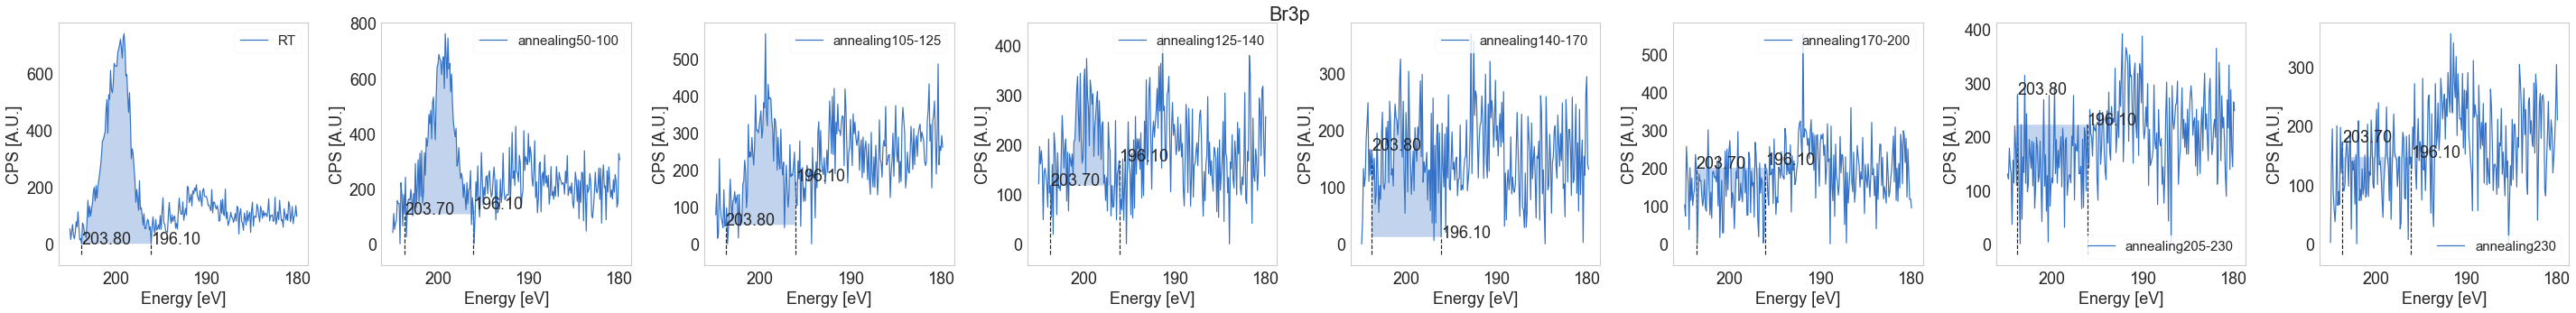

In [43]:
region = 'Br3p'
integrateRegions(proc_exps, region, indRef=0, asf=asf)

### In 3d

[118946.25083379674,
 151200.54033797648,
 157163.49949131242,
 164758.99241305568,
 172621.73379225272,
 185243.01839989668,
 202483.58937994257,
 207053.9502686931]

<Figure size 460.8x403.2 with 0 Axes>

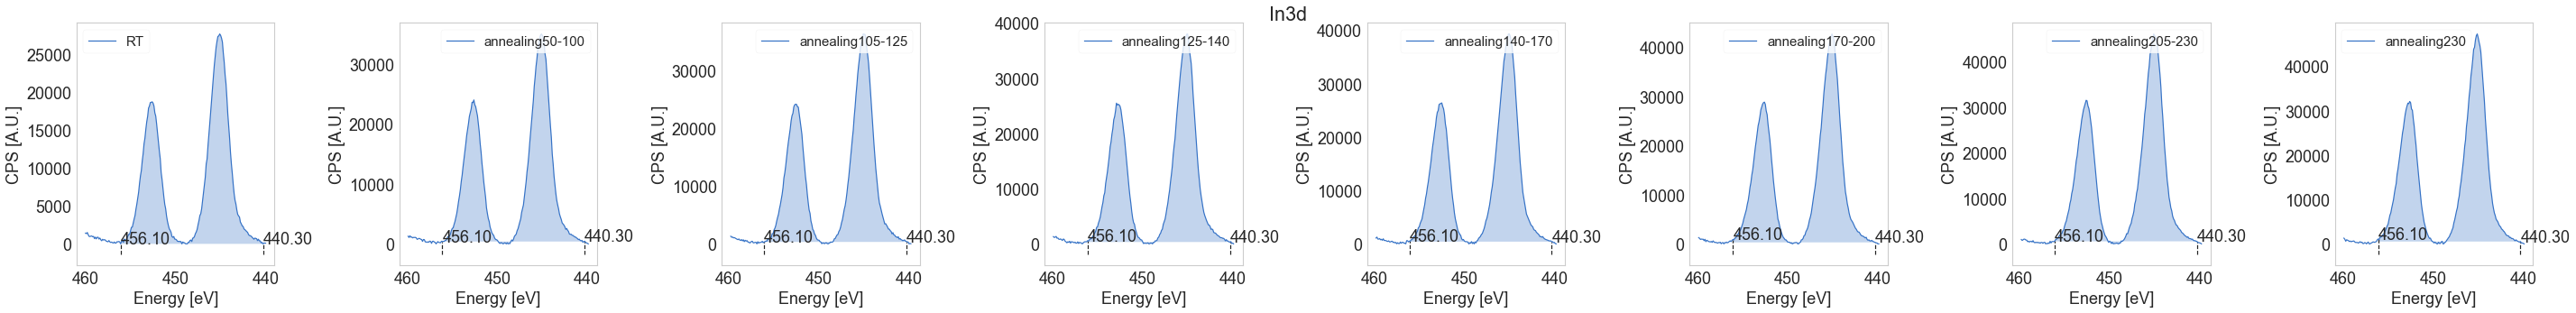

In [44]:
region = 'In3d'
integrateRegions(proc_exps, region, indRef=0, asf=asf)

### Sn 3d

[16664.72587105135,
 19096.19632469475,
 19712.731164566343,
 20631.780759526882,
 22304.977809836295,
 23950.40305214894,
 25972.513725163426,
 27267.029235003934]

<Figure size 460.8x403.2 with 0 Axes>

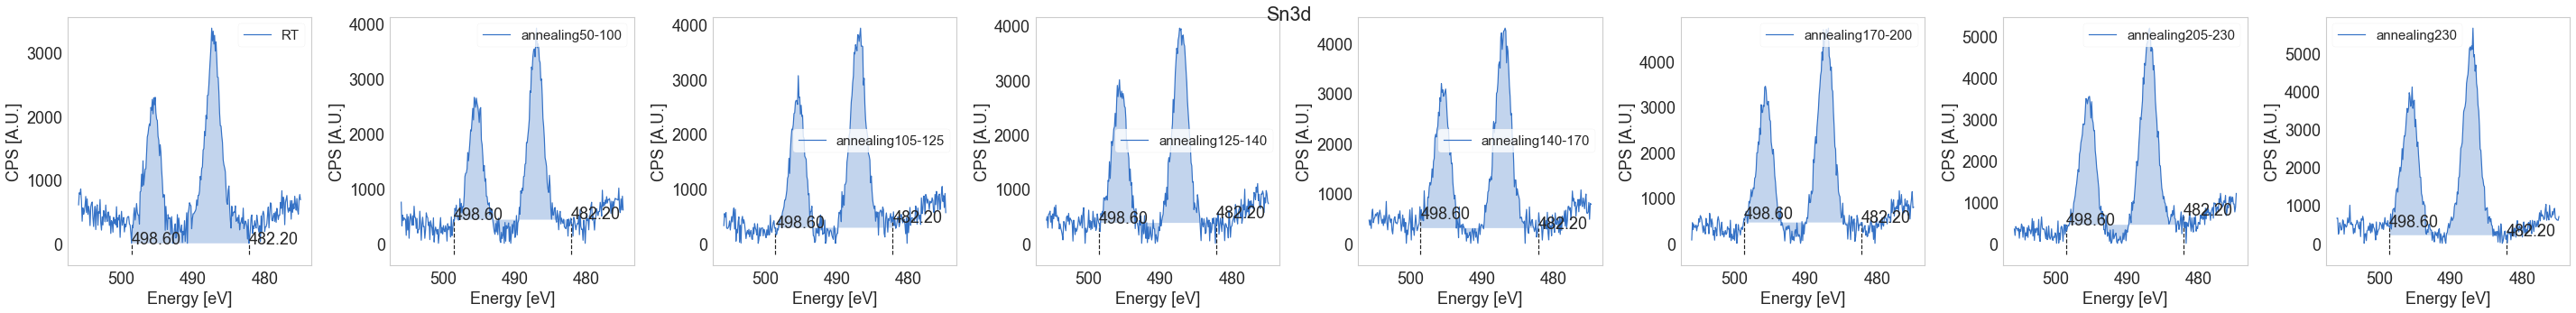

In [45]:
region = 'Sn3d'
integrateRegions(proc_exps, region, indRef=0, asf=asf)

### Si 2p

[2161.3939949785254,
 2824.5848670081637,
 3522.0889199642666,
 3501.3979474986436,
 3778.483160714262,
 3672.5277478903477,
 3225.819467146655,
 3364.1624448659645]

<Figure size 460.8x403.2 with 0 Axes>

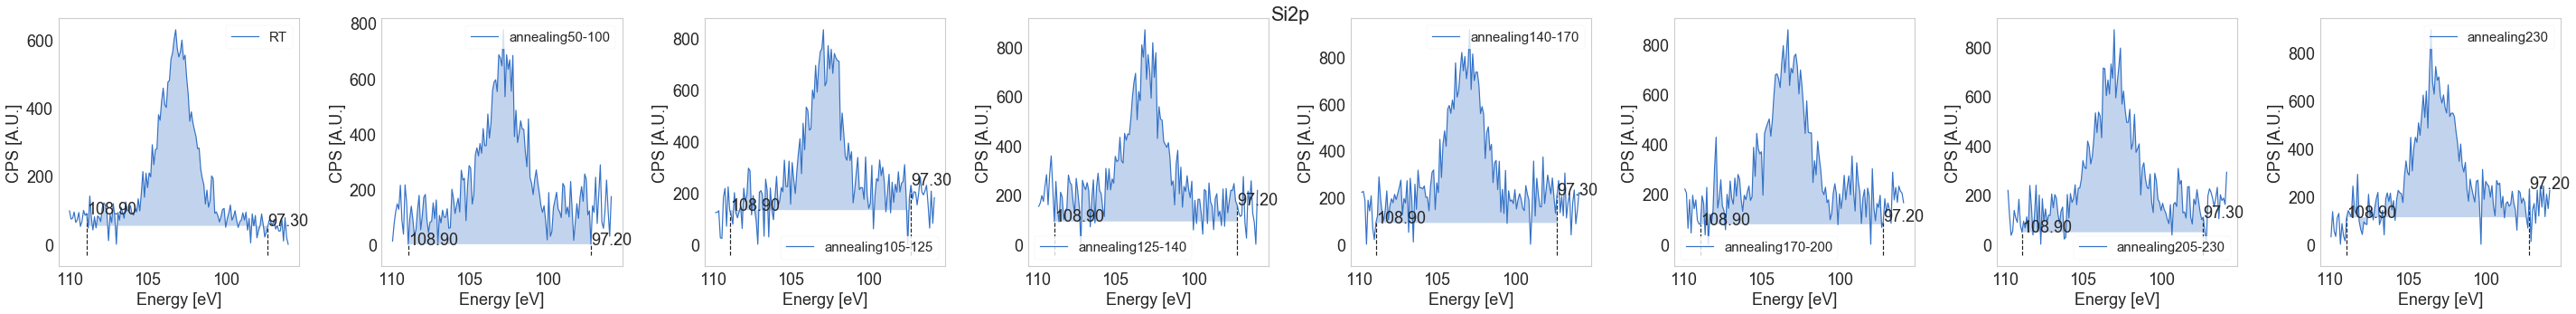

In [46]:
region = 'Si2p'
integrateRegions(proc_exps, region, indRef=1, asf=asf, flag_fill=True)

## Stoichiometry

##### Uncorrected for ITO Oxygen 

In [47]:
num, denom = (('C1s', 'C1s', 'N1s', 'C1s', 'O1s'), ('O1s', 'N1s', 'Si2p', 'Si2p', 'N1s'))
make_stoichometry_table(proc_exps[1:],  num=num, denom=denom)

Experiment	C/O	C/N	N/Si	C/Si	O/N	
annealing50-100	0.70	 4.43	 1.12	 4.94	 6.37	 
annealing105-125	0.67	 4.25	 0.93	 3.94	 6.32	 
annealing125-140	0.61	 3.95	 0.93	 3.69	 6.43	 
annealing140-170	0.54	 4.26	 0.74	 3.14	 7.88	 
annealing170-200	0.44	 3.47	 0.81	 2.81	 7.82	 
annealing205-230	0.35	 3.21	 0.84	 2.69	 9.06	 
annealing230	0.31	 2.50	 0.91	 2.28	 8.01	 


In [48]:
print('Nominal')
print('C/O \t C/N \t N/Si \t C/Si \t O/N')
print(9/3, '\t', '%.3f'%(9/1), '\t', 1, '\t %.3f' %(9/1), '\t %.3f'%(3/1) )

Nominal
C/O 	 C/N 	 N/Si 	 C/Si 	 O/N
3.0 	 9.000 	 1 	 9.000 	 3.000
